In [1]:
# !pip install pandas	
# !pip install numpy
# !pip install tqdm	
# !pip install matplotlib

In [2]:
# 라이브러리
import random
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numpy.random import randint, rand

In [3]:
# 데이터 불러오기
machine_info = pd.read_csv("./data/machine_info.csv")
order_info = pd.read_csv("./data/order_info.csv")

In [4]:
# 전처리 (1): column name 변경
order_info = order_info.rename(columns={
    '영업납기': 'time',
    '중산도면': 'item',
    '단가': 'cost',
    '수량': 'qty',
    '선급': 'urgent'
})

machine_info = machine_info.rename(columns={
    'JSDWG': 'item',
    'MCNO': 'machine',
    'AVG_CT': 'capacity'
})

In [5]:
# 긴급 생산 요건이 있는 경우 1, 그렇지 않은 경우는 0

# 전처리 (2): 분석을 위한 데이터 처리
order_info['urgent'] = order_info['urgent'].fillna(0)

for i in range(len(order_info)):
    if order_info.loc[i, 'urgent'] != 0:
        order_info.loc[i, 'urgent'] = 1

# 전처리 (3): time type 부여 (문자열 → datetime)
order_info['time'] = order_info['time'].apply(
    lambda x: datetime.datetime.strptime(x, '%Y-%m-%d')
)


In [6]:
print(order_info.shape)
order_info.head()

(127, 5)


,time,item,cost,qty,urgent
0,2021-05-13,K04033,25870,318,1
1,2021-05-24,K04031,16229,383,1
2,2021-05-30,051718,8333,19,0
3,2021-06-03,056984,36533,4,0
4,2021-06-18,057791,45500,196,1


In [7]:
print(machine_info.shape)
machine_info.head()

(21151, 3)


,item,machine,capacity
0,050060,433.0,1.08
1,050093,404.0,7.13
2,050093,408.0,4.67
3,050093,410.0,4.50
4,050093,416.0,3.92


In [8]:
 order_info.value_counts()

time        item    cost    qty  urgent
2021-02-10  S00341  2990    500  0         1
2021-02-18  052996  20000   2    0         1
2021-03-10  S00341  2990    500  0         1
2021-04-10  S00341  2990    500  0         1
2021-05-10  S00341  2990    398  0         1
                                          ..
2021-08-15  Z00807  10450   300  0         1
2021-08-18  069559  242250  28   1         1
2021-08-19  K00614  6750    12   0         1
2021-08-31  K04037  7810    400  1         1
2021-09-15  Z00807  10450   325  0         1
Name: count, Length: 127, dtype: int64

In [9]:
machine_info.value_counts()

item    machine  capacity
Z01415  409.0    9.50        1
050060  433.0    1.08        1
050093  404.0    7.13        1
        408.0    4.67        1
        410.0    4.50        1
                            ..
050178  416.0    3.60        1
        424.0    4.50        1
        425.0    2.80        1
        433.0    3.83        1
        435.0    3.42        1
Name: count, Length: 21149, dtype: int64

In [10]:
order_info.describe()

,time,cost,qty
count,127,127.000000,127.000000
mean,2021-06-23 14:55:44.881889792,45204.133858,114.110236
min,2021-02-10 00:00:00,2990.000000,2.000000
25%,2021-06-15 00:00:00,11551.000000,20.000000
50%,2021-06-28 00:00:00,21160.000000,48.000000
75%,2021-07-08 12:00:00,35816.500000,169.000000
max,2021-09-15 00:00:00,481190.000000,716.000000
std,NaN,81277.077503,140.706450


In [11]:
machine_info.describe()

,machine,capacity
count,21149.000000,21151.000000
mean,420.686132,10.441903
std,12.071250,18.304675
min,401.000000,0.050000
25%,409.000000,3.200000
50%,424.000000,5.500000
75%,433.000000,10.500000
max,442.000000,930.000000


In [12]:
date_start = [
    '2021-01-01',
    '2021-02-01',
    '2021-03-01',
    '2021-04-01',
    '2021-05-01',
    '2021-06-01',
    '2021-07-01',
    '2021-08-01',
    '2021-09-01',
]

for i in range(len(date_start) - 1):
    check_df = order_info[
        (order_info['time'] > date_start[i]) &
        (order_info['time'] < date_start[i + 1])
    ]
    print(f'{date_start[i]} ~ {date_start[i + 1]} 생산 주문 건 수: {len(check_df)}')


2021-01-01 ~ 2021-02-01 생산 주문 건 수: 0
2021-02-01 ~ 2021-03-01 생산 주문 건 수: 2
2021-03-01 ~ 2021-04-01 생산 주문 건 수: 1
2021-04-01 ~ 2021-05-01 생산 주문 건 수: 1
2021-05-01 ~ 2021-06-01 생산 주문 건 수: 8
2021-06-01 ~ 2021-07-01 생산 주문 건 수: 63
2021-07-01 ~ 2021-08-01 생산 주문 건 수: 40
2021-08-01 ~ 2021-09-01 생산 주문 건 수: 4


In [13]:
# 데이터 정제 (전처리)
# NaN 값 처리
n_before_preprocess = len(machine_info)
machine_info.dropna(axis=0, inplace=True)
n_after_preprocess = len(machine_info)
print(
    f'machine_info: NaN 값 제거 '
    f'({n_before_preprocess} row --> {n_after_preprocess} row, '
    f'{round(((n_before_preprocess - n_after_preprocess) / n_before_preprocess * 100), 3)}% 삭제)'
)

n_before_preprocess = len(order_info)
order_info = order_info[['time', 'item', 'cost', 'qty', 'urgent']]
order_info.dropna(axis=0, inplace=True)
n_after_preprocess = len(order_info)
print(
    f'order_info: NaN 값 제거 '
    f'({n_before_preprocess} row --> {n_after_preprocess} row, '
    f'{round(((n_before_preprocess - n_after_preprocess) / n_before_preprocess * 100), 3)}% 삭제)'
)


machine_info: NaN 값 제거 (21151 row --> 21149 row, 0.009% 삭제)
order_info: NaN 값 제거 (127 row --> 127 row, 0.0% 삭제)


In [14]:
# unique 처리
machine_info[['item','machine']].value_counts().head()

item    machine
Z01415  409.0      1
050060  433.0      1
050093  404.0      1
        408.0      1
        410.0      1
Name: count, dtype: int64

In [15]:
order_info[['time','item','cost','urgent']].value_counts().head()

time        item    cost   urgent
2021-06-15  K03115  26719  0         2
2021-07-09  057386  24418  1         2
            057387  17794  1         2
2021-02-10  S00341  2990   0         1
2021-05-10  S00341  2990   0         1
Name: count, dtype: int64

In [16]:
order_info[(order_info['time']=='2021-06-15')&(order_info['item']=='K03115')]

,time,item,cost,qty,urgent
32,2021-06-15,K03115,26719,30,0
34,2021-06-15,K03115,26719,28,0


In [17]:
order_info	=order_info.groupby(['time','item','cost','urgent']).sum().reset_index()

In [18]:
order_info[(order_info['time']=='2021-06-15')&(order_info['item']=='K03115')]

,time,item,cost,urgent,qty
34,2021-06-15,K03115,26719,0,58


In [19]:
# 1월~6월 주문 고려
filtered_order_info = order_info[
    (order_info['time'] > '2021-01-01') &
    (order_info['time'] < '2021-06-01')
]

filtered_order_info

,time,item,cost,urgent,qty
0,2021-02-10,S00341,2990,0,500
1,2021-02-18,052996,20000,0,2
2,2021-03-10,S00341,2990,0,500
3,2021-04-10,S00341,2990,0,500
4,2021-05-10,S00341,2990,0,398
5,2021-05-13,066157,18500,1,208
6,2021-05-13,K04033,25870,1,318
7,2021-05-24,K04031,16229,1,383
8,2021-05-30,051718,8333,0,19
9,2021-05-30,052996,20000,0,2


In [20]:
dataset	=pd.merge(filtered_order_info,machine_info,on='item',how='inner')
dataset.to_csv('dataset.csv',index=False)

In [35]:
dataset.head()

,time,item,cost,urgent,qty,machine,capacity
0,2021-02-10,S00341,2990,0,500,410.0,4.6
1,2021-02-18,052996,20000,0,2,410.0,25.0
2,2021-02-18,052996,20000,0,2,421.0,200.0
3,2021-03-10,S00341,2990,0,500,410.0,4.6
4,2021-04-10,S00341,2990,0,500,410.0,4.6


In [21]:
# 데이터셋 로드
dataset = pd.read_csv('dataset.csv')

# 변수 정보 추출
T = list(set(dataset['time']))
I = list(set(dataset['item']))
J = list(set(dataset['machine']))


In [22]:
# cit = 날짜 t에, item i가 미생산 될 때 발생하는 비용
cit = dict()
for i in I:
    for t in T:
        temp_dataset = dataset[(dataset['item'] == i) & (dataset['time'] == t)]
        if len(temp_dataset) != 0:
            value = list(set(temp_dataset['cost']))[0]
            cit[i, t] = value
        else:
            cit[i, t] = 0

# pit = 날짜 t에, item i가 긴급 생산이 필요한 경우 1, 그렇지 않으면 0
pit = dict()
for i in I:
    for t in T:
        temp_dataset = dataset[(dataset['item'] == i) & (dataset['time'] == t)]
        if len(temp_dataset) != 0:
            value = list(set(temp_dataset['urgent']))[0]
            pit[i, t] = value
        else:
            pit[i, t] = 0

# dit = 날짜 t에 item i마다 생산되어야 하는 요구량
dit = dict()
for i in I:
    for t in T:
        temp_dataset = dataset[(dataset['item'] == i) & (dataset['time'] == t)]
        if len(temp_dataset) != 0:
            value = list(set(temp_dataset['qty']))[0]
            dit[i, t] = value
        else:
            dit[i, t] = 0

# mijt= 날짜 t에 NC machine j가 item i를 생산할 수 있는 능력
mijt = dict()
for i in I:
    for j in J:
        temp_dataset = dataset[
            (dataset['item'] == i) &
            (dataset['machine'] == j)
        ]

        if len(temp_dataset) != 0:
            value = list(set(temp_dataset['capacity']))[0]
            for t in T:
                mijt[i, j, t] = value
        else:
            for t in T:
                mijt[i, j, t] = 0

In [36]:
print(cit)

{('K04033', '2021-05-10'): 0, ('K04033', '2021-05-31'): 0, ('K04033', '2021-02-10'): 0, ('K04033', '2021-05-30'): 0, ('K04033', '2021-02-18'): 0, ('K04033', '2021-05-13'): 25870, ('K04033', '2021-05-24'): 0, ('K04033', '2021-03-10'): 0, ('K04033', '2021-04-10'): 0, ('066157', '2021-05-10'): 0, ('066157', '2021-05-31'): 0, ('066157', '2021-02-10'): 0, ('066157', '2021-05-30'): 0, ('066157', '2021-02-18'): 0, ('066157', '2021-05-13'): 18500, ('066157', '2021-05-24'): 0, ('066157', '2021-03-10'): 0, ('066157', '2021-04-10'): 0, ('052996', '2021-05-10'): 0, ('052996', '2021-05-31'): 0, ('052996', '2021-02-10'): 0, ('052996', '2021-05-30'): 20000, ('052996', '2021-02-18'): 20000, ('052996', '2021-05-13'): 0, ('052996', '2021-05-24'): 0, ('052996', '2021-03-10'): 0, ('052996', '2021-04-10'): 0, ('S00271', '2021-05-10'): 0, ('S00271', '2021-05-31'): 4000, ('S00271', '2021-02-10'): 0, ('S00271', '2021-05-30'): 0, ('S00271', '2021-02-18'): 0, ('S00271', '2021-05-13'): 0, ('S00271', '2021-05-24'

In [37]:
print(pit)

{('K04033', '2021-05-10'): 0, ('K04033', '2021-05-31'): 0, ('K04033', '2021-02-10'): 0, ('K04033', '2021-05-30'): 0, ('K04033', '2021-02-18'): 0, ('K04033', '2021-05-13'): 1, ('K04033', '2021-05-24'): 0, ('K04033', '2021-03-10'): 0, ('K04033', '2021-04-10'): 0, ('066157', '2021-05-10'): 0, ('066157', '2021-05-31'): 0, ('066157', '2021-02-10'): 0, ('066157', '2021-05-30'): 0, ('066157', '2021-02-18'): 0, ('066157', '2021-05-13'): 1, ('066157', '2021-05-24'): 0, ('066157', '2021-03-10'): 0, ('066157', '2021-04-10'): 0, ('052996', '2021-05-10'): 0, ('052996', '2021-05-31'): 0, ('052996', '2021-02-10'): 0, ('052996', '2021-05-30'): 0, ('052996', '2021-02-18'): 0, ('052996', '2021-05-13'): 0, ('052996', '2021-05-24'): 0, ('052996', '2021-03-10'): 0, ('052996', '2021-04-10'): 0, ('S00271', '2021-05-10'): 0, ('S00271', '2021-05-31'): 0, ('S00271', '2021-02-10'): 0, ('S00271', '2021-05-30'): 0, ('S00271', '2021-02-18'): 0, ('S00271', '2021-05-13'): 0, ('S00271', '2021-05-24'): 0, ('S00271', '2

In [38]:
print(dit)

{('K04033', '2021-05-10'): 0, ('K04033', '2021-05-31'): 0, ('K04033', '2021-02-10'): 0, ('K04033', '2021-05-30'): 0, ('K04033', '2021-02-18'): 0, ('K04033', '2021-05-13'): 318, ('K04033', '2021-05-24'): 0, ('K04033', '2021-03-10'): 0, ('K04033', '2021-04-10'): 0, ('066157', '2021-05-10'): 0, ('066157', '2021-05-31'): 0, ('066157', '2021-02-10'): 0, ('066157', '2021-05-30'): 0, ('066157', '2021-02-18'): 0, ('066157', '2021-05-13'): 208, ('066157', '2021-05-24'): 0, ('066157', '2021-03-10'): 0, ('066157', '2021-04-10'): 0, ('052996', '2021-05-10'): 0, ('052996', '2021-05-31'): 0, ('052996', '2021-02-10'): 0, ('052996', '2021-05-30'): 2, ('052996', '2021-02-18'): 2, ('052996', '2021-05-13'): 0, ('052996', '2021-05-24'): 0, ('052996', '2021-03-10'): 0, ('052996', '2021-04-10'): 0, ('S00271', '2021-05-10'): 0, ('S00271', '2021-05-31'): 150, ('S00271', '2021-02-10'): 0, ('S00271', '2021-05-30'): 0, ('S00271', '2021-02-18'): 0, ('S00271', '2021-05-13'): 0, ('S00271', '2021-05-24'): 0, ('S0027

In [39]:
print(mijt)

{('K04033', 404.0, '2021-05-10'): 12.84, ('K04033', 404.0, '2021-05-31'): 12.84, ('K04033', 404.0, '2021-02-10'): 12.84, ('K04033', 404.0, '2021-05-30'): 12.84, ('K04033', 404.0, '2021-02-18'): 12.84, ('K04033', 404.0, '2021-05-13'): 12.84, ('K04033', 404.0, '2021-05-24'): 12.84, ('K04033', 404.0, '2021-03-10'): 12.84, ('K04033', 404.0, '2021-04-10'): 12.84, ('K04033', 405.0, '2021-05-10'): 10.42, ('K04033', 405.0, '2021-05-31'): 10.42, ('K04033', 405.0, '2021-02-10'): 10.42, ('K04033', 405.0, '2021-05-30'): 10.42, ('K04033', 405.0, '2021-02-18'): 10.42, ('K04033', 405.0, '2021-05-13'): 10.42, ('K04033', 405.0, '2021-05-24'): 10.42, ('K04033', 405.0, '2021-03-10'): 10.42, ('K04033', 405.0, '2021-04-10'): 10.42, ('K04033', 407.0, '2021-05-10'): 8.69, ('K04033', 407.0, '2021-05-31'): 8.69, ('K04033', 407.0, '2021-02-10'): 8.69, ('K04033', 407.0, '2021-05-30'): 8.69, ('K04033', 407.0, '2021-02-18'): 8.69, ('K04033', 407.0, '2021-05-13'): 8.69, ('K04033', 407.0, '2021-05-24'): 8.69, ('K040

In [ ]:
# 머신 j가 시간 t에 아이템 i를 만들수 없을 경우 0으로 처리하기 위함함
def decode(mijt, xijt):
    for j in J:
        for t in T:
            for i in I:
                if mijt[i, j, t] == 0:
                    xijt[i, j, t] = 0
    return xijt

# 목적함수를 최적화하기 위한 xijt 조합을 임의로 생성하는 함수
def generation_xijt():
    xijt = {}

    for i in I:
        for j in J:
            for t in T:
                if dit[i, t] > 0:
                    xijt[i, j, t] = random.uniform(0, 1)
                else:
                    xijt[i, j, t] = 0

    xijt = decode(mijt, xijt)
    return xijt


In [24]:
def dict2list(xijt):
    return list(xijt.values())

def list2dict(bitstring, type='xijt'):
    if type == 'xijt':
        _keys = xijt_keys
    elif type == 'mijt':
        _keys = mijt_keys

    xijt = {}
    for idx, value in enumerate(bitstring):
        xijt[_keys[idx]] = value

    return xijt


In [ ]:
# 제약조건 확인
# 기계 하루 총 생산시간은 600분
# j기계로 600분 안에 아이템 i를 생산할 수 없다면 아이템 생산하지 않도록 하기 위함.
def constraint_check(xijt):
    for j in J:
        for t in T:
            check_value = sum(mijt[i, j, t] * round(xijt[i, j, t] * dit[i, t]) for i in I) <= 600

            if check_value is False:
                for i in I:
                    xijt[i, j, t] = 0

    return xijt


In [ ]:
# 목적 함수
def objective(xijt):
    uit = {}
    xijt = constraint_check(xijt)

    for i in I:
        for t in T:
            u = dit[i, t] - sum(round(xijt[i, j, t] * dit[i, t]) for j in J)
            if u >= 0:
                uit[i, t] = u
            else:
                uit[i, t] = abs(u) * 10_000_000

    objective = sum(uit[i, t] * cit[i, t] * pit[i, t] for i in I for t in T)
    return objective


In [28]:
# Tournament selection
def selection(pop, scores):
    # n_pop은 한 세대를 구성하는 염색체 수이며, 하이퍼파라미터 값
    k = round(n_pop * 0.5)
    selection_ix = randint(len(pop))
    
    for ix in randint(0, len(pop), k - 1):
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
            
    return pop[selection_ix]


In [29]:
def crossover(p1, p2, r_cross):
    p1 = dict2list(p1)
    p2 = dict2list(p2)
    c1, c2 = p1.copy(), p2.copy()

    if rand() < r_cross:
        base_bitstring = dict2list(mijt)

        # crossover (1): 유효 인덱스 추출
        valid_index = []
        for i in range(len(base_bitstring)):
            if base_bitstring[i] > 0:
                valid_index.append(i)

        n = round(r_cross * len(valid_index))
        pt_0 = random.sample(valid_index, n)
        pt_1 = list(set(valid_index) - set(pt_0))

        # crossover (2): 교차 적용
        for i in pt_0:
            c1[i] = p2[i]
            c2[i] = p1[i]

        for i in pt_1:
            c1[i] = p2[i]
            c2[i] = p1[i]

    return [c1, c2]


In [30]:
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        if rand() < r_mut:
            base_bitstring = dict2list(mijt)

            # mutation (1): 유효 인덱스 찾기
            valid_index = []
            for j in range(len(base_bitstring)):
                if base_bitstring[j] > 0:
                    valid_index.append(j)

            n = round(r_mut * len(valid_index))

            # mutation (2): 무작위 인덱스에서 값 변경
            pt_0 = random.sample(valid_index, n)
            for idx in pt_0:
                bitstring[idx] = random.uniform(0, 1)


In [31]:
def genetic_algorithm(bounds, n_iter, n_pop, r_cross, r_mut):
    # Utility
    log = []
    log_detail = []
    best_gen = 0

    # GA algorithm 초기화
    pop = [generation_xijt() for _ in range(n_pop)]
    best = decode(mijt, pop[0])
    best_eval = objective(best)
    print(best_eval)

    for gen in tqdm(range(n_iter)):
        # 현재 세대 해를 디코딩
        decoded = [decode(mijt, p) for p in pop]

        # 목적함수 값 계산
        scores = [objective(d) for d in decoded]

        # 가장 좋은 해 갱신
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(f'>best! {gen}, {scores[i]}')
                best_gen = gen
            else:
                # stop rule: 개선 없이 100세대 이상일 경우 중단
                if gen - best_gen > 100:
                    print('stop')
                    return [best, best_eval, log, log_detail]

        # 부모 해 집합 선택
        selected = [selection(pop, scores) for _ in range(n_pop)]
        log_detail.append([gen, objective(selected[0])])

        # 자식 세대 생성
        children = []
        for i in range(0, n_pop, 2):
            p1, p2 = selected[i], selected[i + 1]
            for c in crossover(p1, p2, r_cross):
                mutation(c, r_mut)
                children.append(list2dict(c))

        pop = children
        log.append([gen, best_eval])

    return [best, best_eval, log, log_detail]


In [32]:
# 하이퍼파라미터 설정
hyper_parameters = pd.DataFrame({
    'index':    ['index_1', 'index_2', 'index_3', 'index_4',
                 'index_5', 'index_6', 'index_7', 'index_8'],
    'n_iter':   [200, 200, 200, 200, 200, 200, 200, 200],
    'n_pop':    [10, 20, 40, 20, 20, 20, 20, 20],
    'r_cross':  [0.4, 0.4, 0.4, 0.1, 0.2, 0.3, 0.4, 0.4],
    'r_mut':    [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.1, 0.6]
})

# 결과 기록용 열 추가
hyper_parameters['objective'] = np.nan
hyper_parameters['time'] = np.nan

# 출력
hyper_parameters


,index,n_iter,n_pop,r_cross,r_mut,objective,time
0,index_1,200,10,0.4,0.4,NaN,NaN
1,index_2,200,20,0.4,0.4,NaN,NaN
2,index_3,200,40,0.4,0.4,NaN,NaN
3,index_4,200,20,0.1,0.4,NaN,NaN
4,index_5,200,20,0.2,0.4,NaN,NaN
5,index_6,200,20,0.3,0.4,NaN,NaN
6,index_7,200,20,0.4,0.1,NaN,NaN
7,index_8,200,20,0.4,0.6,NaN,NaN


In [33]:
log_list = []

for i in range(len(hyper_parameters)):
    parameter = hyper_parameters.iloc[i]
    index_nm = parameter['index']
    print(f'{index_nm}')

    start = datetime.datetime.now()

    # 초기 해 및 키 정의
    xijt = generation_xijt()
    xijt_keys = list(xijt.keys())
    mijt_keys = list(mijt.keys())

    # 하이퍼파라미터 설정
    n_iter = parameter['n_iter']
    n_pop = parameter['n_pop']
    r_cross = parameter['r_cross']
    r_mut = parameter['r_mut']

    # 유전 알고리즘 실행
    best, score, log, log_detail = genetic_algorithm(mijt, n_iter, n_pop, r_cross, r_mut)

    # 실행 시간 및 결과 기록
    elapsed_time = datetime.datetime.now() - start
    hyper_parameters.loc[i, 'time'] = elapsed_time
    hyper_parameters.loc[i, 'objective'] = score

    log_list.append(log)

# 결과 출력
hyper_parameters


index_1
14443819720490


  0%|          | 0/200 [00:00<?, ?it/s]

>best! 0, 13632370600070
>best! 0, 7379120


  0%|          | 1/200 [00:01<05:11,  1.57s/it]

>best! 1, 6936653


  2%|▏         | 4/200 [00:05<04:47,  1.47s/it]

>best! 4, 6357711


  5%|▌         | 10/200 [00:14<04:34,  1.44s/it]

>best! 10, 4919896


  8%|▊         | 16/200 [00:23<04:46,  1.56s/it]

>best! 16, 4865928
>best! 16, 4326836


 32%|███▎      | 65/200 [01:27<02:51,  1.27s/it]

>best! 65, 3932198


 52%|█████▏    | 104/200 [02:12<01:49,  1.14s/it]

>best! 104, 3299191


100%|██████████| 200/200 [04:12<00:00,  1.26s/it]
/tmp/ipykernel_4374/802720307.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0:04:12.584590' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  hyper_parameters.loc[i, 'time'] = elapsed_time


index_2
62481657030010


  0%|          | 0/200 [00:00<?, ?it/s]

>best! 0, 12357783
>best! 0, 7494866
>best! 0, 4492167


 12%|█▏        | 23/200 [01:02<06:42,  2.27s/it]

>best! 23, 4198782


 18%|█▊        | 37/200 [01:32<05:59,  2.20s/it]

>best! 37, 3609213


 69%|██████▉   | 138/200 [04:51<02:11,  2.11s/it]


stop
index_3
41221668530470


  0%|          | 0/200 [00:00<?, ?it/s]

>best! 0, 7198930
>best! 0, 6779344
>best! 0, 6556380
>best! 0, 5791827


  0%|          | 1/200 [00:04<13:48,  4.16s/it]

>best! 1, 5126235


  2%|▏         | 3/200 [00:12<13:22,  4.07s/it]

>best! 3, 4941128


  6%|▌         | 12/200 [00:48<12:36,  4.02s/it]

>best! 12, 4823347


  8%|▊         | 17/200 [01:07<11:41,  3.83s/it]

>best! 17, 4640811


 10%|█         | 21/200 [01:25<12:56,  4.34s/it]

>best! 21, 4407445


 47%|████▋     | 94/200 [06:12<06:50,  3.87s/it]

>best! 94, 4360740


 58%|█████▊    | 117/200 [07:41<05:20,  3.86s/it]

>best! 117, 4173222


 66%|██████▌   | 131/200 [08:37<04:48,  4.18s/it]

>best! 131, 4136105


 71%|███████   | 142/200 [09:21<03:48,  3.94s/it]

>best! 142, 3397540


100%|██████████| 200/200 [13:11<00:00,  3.96s/it]


index_4
7777347


  1%|          | 2/200 [00:03<06:17,  1.91s/it]

>best! 2, 7387412
>best! 2, 6178485


  5%|▌         | 10/200 [00:19<06:03,  1.91s/it]

>best! 10, 3596391


 30%|███       | 61/200 [02:00<04:57,  2.14s/it]

>best! 61, 3124850


 81%|████████  | 162/200 [05:17<01:14,  1.96s/it]


stop
index_5
10175866


  0%|          | 0/200 [00:00<?, ?it/s]

>best! 0, 8417188
>best! 0, 8383283
>best! 0, 7158235


  0%|          | 1/200 [00:01<06:25,  1.94s/it]

>best! 1, 6049360


  2%|▏         | 3/200 [00:05<06:17,  1.92s/it]

>best! 3, 4989815


  8%|▊         | 17/200 [00:33<05:51,  1.92s/it]

>best! 17, 4061612


 44%|████▍     | 88/200 [02:53<03:45,  2.02s/it]

>best! 88, 3967709


 94%|█████████▍| 189/200 [06:22<00:22,  2.03s/it]


stop
index_6
7442323


  0%|          | 0/200 [00:00<?, ?it/s]

>best! 0, 6705590


  0%|          | 1/200 [00:01<06:22,  1.92s/it]

>best! 1, 5780537


  2%|▏         | 3/200 [00:05<06:10,  1.88s/it]

>best! 3, 5547139


  2%|▏         | 4/200 [00:07<06:07,  1.87s/it]

>best! 4, 5470429


  2%|▎         | 5/200 [00:09<06:05,  1.88s/it]

>best! 5, 5259120


  8%|▊         | 15/200 [00:28<05:52,  1.90s/it]

>best! 15, 4263355


 16%|█▌        | 31/200 [00:58<05:24,  1.92s/it]

>best! 31, 3788493


 66%|██████▌   | 132/200 [04:15<02:11,  1.94s/it]


stop
index_7
13846834


  0%|          | 0/200 [00:00<?, ?it/s]

>best! 0, 10457383
>best! 0, 9065705
>best! 0, 5068528


  3%|▎         | 6/200 [00:01<01:00,  3.23it/s]

>best! 6, 4841665


 16%|█▋        | 33/200 [00:10<00:51,  3.26it/s]

>best! 33, 4317441


 23%|██▎       | 46/200 [00:14<00:46,  3.28it/s]

>best! 46, 3646749


 42%|████▎     | 85/200 [00:26<00:34,  3.31it/s]

>best! 85, 2635848


 93%|█████████▎| 186/200 [00:58<00:04,  3.16it/s]


stop
index_8
45928080651810


  0%|          | 0/200 [00:00<?, ?it/s]

>best! 0, 7911357
>best! 0, 5860396
>best! 0, 5054249


  2%|▏         | 3/200 [00:10<11:55,  3.63s/it]

>best! 3, 4893887


  5%|▌         | 10/200 [00:36<11:20,  3.58s/it]

>best! 10, 4727440


 10%|█         | 21/200 [01:15<10:28,  3.51s/it]

>best! 21, 4269375


 19%|█▉        | 38/200 [02:19<10:00,  3.71s/it]

>best! 38, 4142693


 23%|██▎       | 46/200 [02:49<09:09,  3.57s/it]

>best! 46, 3563119


 74%|███████▎  | 147/200 [08:50<03:11,  3.61s/it]

stop


,index,n_iter,n_pop,r_cross,r_mut,objective,time
0,index_1,200,10,0.4,0.4,3299191.0,0:04:12.584590
1,index_2,200,20,0.4,0.4,3609213.0,0:04:51.781417
2,index_3,200,40,0.4,0.4,3397540.0,0:13:11.443023
3,index_4,200,20,0.1,0.4,3124850.0,0:05:17.151025
4,index_5,200,20,0.2,0.4,3967709.0,0:06:22.958151
5,index_6,200,20,0.3,0.4,3788493.0,0:04:16.002734
6,index_7,200,20,0.4,0.1,2635848.0,0:00:58.812051
7,index_8,200,20,0.4,0.6,3563119.0,0:08:50.340408


In [34]:
hyper_parameters

,index,n_iter,n_pop,r_cross,r_mut,objective,time
0,index_1,200,10,0.4,0.4,3299191.0,0:04:12.584590
1,index_2,200,20,0.4,0.4,3609213.0,0:04:51.781417
2,index_3,200,40,0.4,0.4,3397540.0,0:13:11.443023
3,index_4,200,20,0.1,0.4,3124850.0,0:05:17.151025
4,index_5,200,20,0.2,0.4,3967709.0,0:06:22.958151
5,index_6,200,20,0.3,0.4,3788493.0,0:04:16.002734
6,index_7,200,20,0.4,0.1,2635848.0,0:00:58.812051
7,index_8,200,20,0.4,0.6,3563119.0,0:08:50.340408


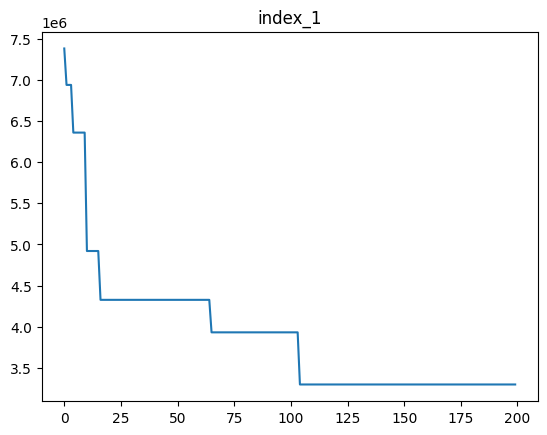

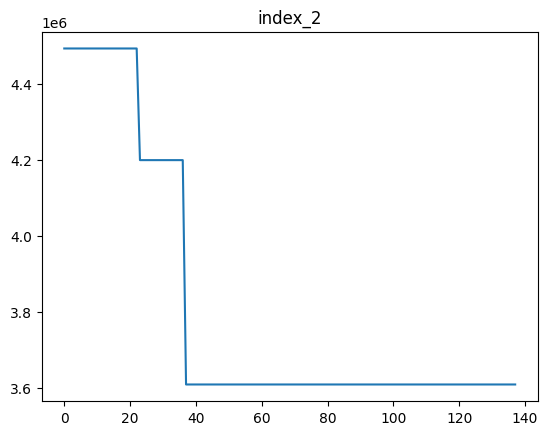

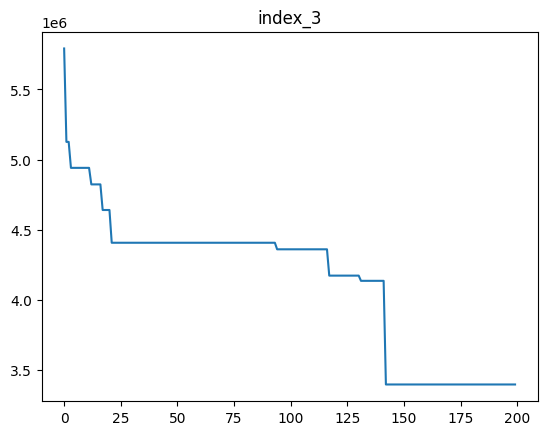

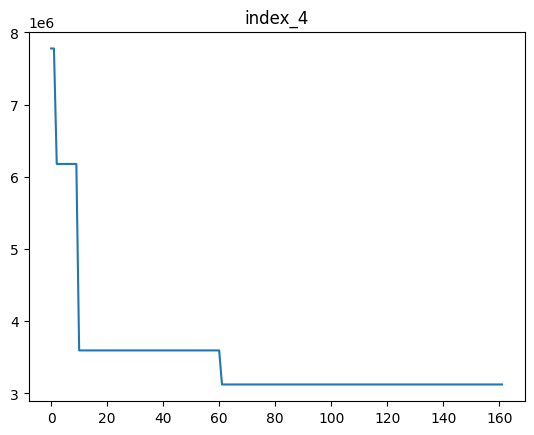

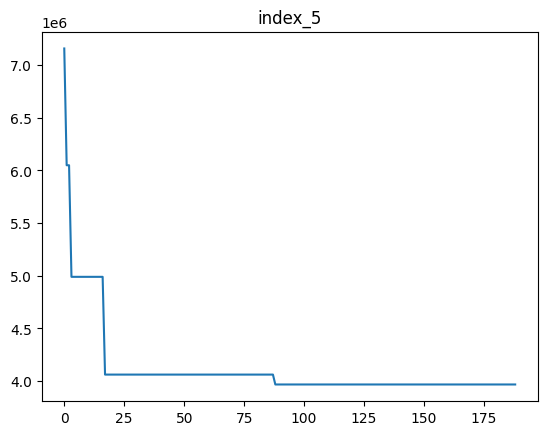

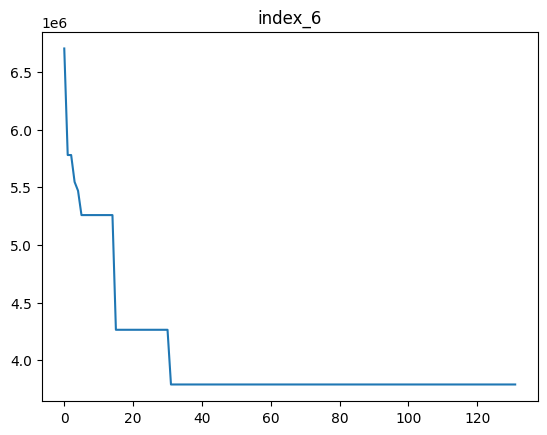

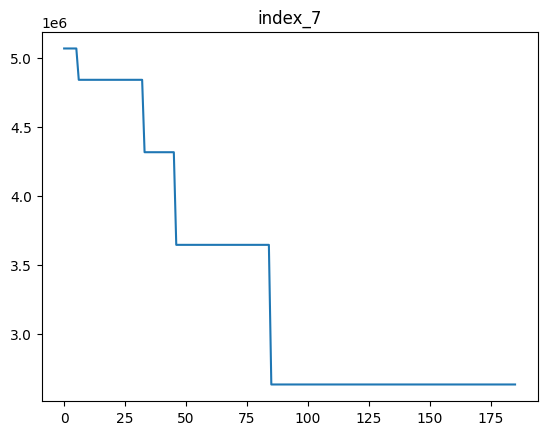

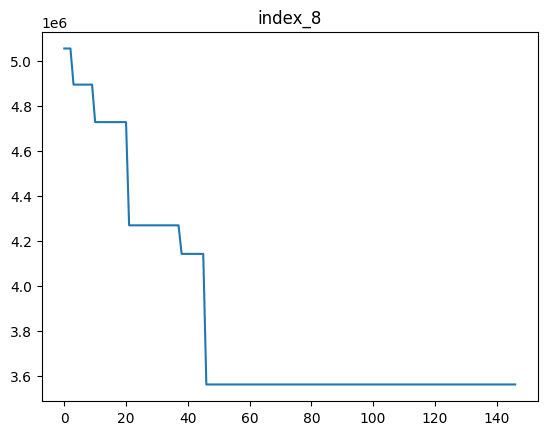

In [40]:
for i in range(len(log_list)):
    df = pd.DataFrame(log_list[i])
    plt.plot(list(df[1]))
    plt.title(f'index_{i + 1}')
    plt.show()


12394097


  0%|          | 0/200 [00:00<?, ?it/s]

>best! 0, 10080259
>best! 0, 8549912
>best! 0, 7132204


  2%|▎         | 5/200 [00:13<08:58,  2.76s/it]

>best! 5, 5416193


  6%|▌         | 12/200 [00:29<07:00,  2.24s/it]

>best! 12, 5066803


 34%|███▎      | 67/200 [02:25<04:12,  1.90s/it]

>best! 67, 3710305


 84%|████████▍ | 168/200 [05:43<01:05,  2.05s/it]


stop
Done!


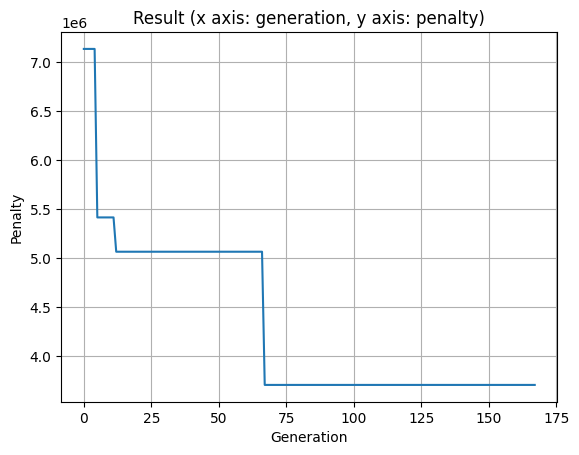

In [41]:
# 입력 데이터 생성
xijt = generation_xijt()
xijt_keys = list(xijt.keys())
mijt_keys = list(mijt.keys())

# 유전 알고리즘 하이퍼파라미터 설정
n_iter = 200       # 반복할 세대 수
n_pop = 20         # 세대당 염색체 수
r_cross = 0.3      # 교차율
r_mut = 0.4        # 변이율

# 유전 알고리즘 실행
best, score, log, log_detail = genetic_algorithm(mijt, n_iter, n_pop, r_cross, r_mut)

# 결과 출력 및 시각화
print('Done!')
df_log = pd.DataFrame(log)
plt.plot(list(df_log[1]))
plt.title('Result (x axis: generation, y axis: penalty)')
plt.xlabel('Generation')
plt.ylabel('Penalty')
plt.grid(True)
plt.show()


In [42]:
# 해 솔루션 저장용 딕셔너리 초기화
solution_ = dict()

# xijt 디코딩
xijt = decode(mijt, xijt)

# best 해를 기반으로 해를 계산
for i in I:
    for j in J:
        for t in T:
            solution_[(i, j, t)] = round(best[i, j, t] * dit[i, t])

# 딕셔너리를 DataFrame으로 변환
sol = pd.DataFrame.from_dict(solution_, orient='index').reset_index()
sol.columns = ['(item, machine, time)', 'qty']

# CSV로 저장 후 다시 불러오기
sol.to_csv('GA_solution.csv', index=False)
sol = pd.read_csv('GA_solution.csv')

# 수량이 0보다 큰 해만 출력
print(sol[sol['qty'] > 0])


                (item, machine, time)  qty
5     ('K04033', 404.0, '2021-05-13')    3
14    ('K04033', 405.0, '2021-05-13')    2
59    ('K04033', 412.0, '2021-05-13')   14
68    ('K04033', 416.0, '2021-05-13')    8
86    ('K04033', 422.0, '2021-05-13')   99
95    ('K04033', 424.0, '2021-05-13')   20
122   ('K04033', 433.0, '2021-05-13')   23
131   ('K04033', 434.0, '2021-05-13')    7
158   ('K04033', 438.0, '2021-05-13')  124
311   ('066157', 434.0, '2021-05-13')   37
435   ('052996', 421.0, '2021-05-30')    1
640   ('S00271', 425.0, '2021-05-31')   83
750   ('051718', 408.0, '2021-05-30')    2
759   ('051718', 409.0, '2021-05-30')    7
768   ('051718', 410.0, '2021-05-30')    7
777   ('051718', 412.0, '2021-05-30')    3
786   ('051718', 416.0, '2021-05-30')    8
813   ('051718', 424.0, '2021-05-30')   12
822   ('051718', 425.0, '2021-05-30')    7
831   ('051718', 426.0, '2021-05-30')    9
840   ('051718', 433.0, '2021-05-30')    9
849   ('051718', 434.0, '2021-05-30')   12
858   ('051

In [44]:
print(len(sol[sol['qty'] > 0]))
sol[sol['qty'] > 0]

37


,"(item, machine, time)",qty
5,"('K04033', 404.0, '2021-05-13')",3
14,"('K04033', 405.0, '2021-05-13')",2
59,"('K04033', 412.0, '2021-05-13')",14
68,"('K04033', 416.0, '2021-05-13')",8
86,"('K04033', 422.0, '2021-05-13')",99
95,"('K04033', 424.0, '2021-05-13')",20
122,"('K04033', 433.0, '2021-05-13')",23
131,"('K04033', 434.0, '2021-05-13')",7
158,"('K04033', 438.0, '2021-05-13')",124
311,"('066157', 434.0, '2021-05-13')",37
